In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
# import data
dataset=pd.read_csv('delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# **EDA**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-7-21db1249f3b9>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
<ipython-input-7-21db1249f3b9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Delivery Time'])
<ipython-input-7-21db1249f3b9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code t

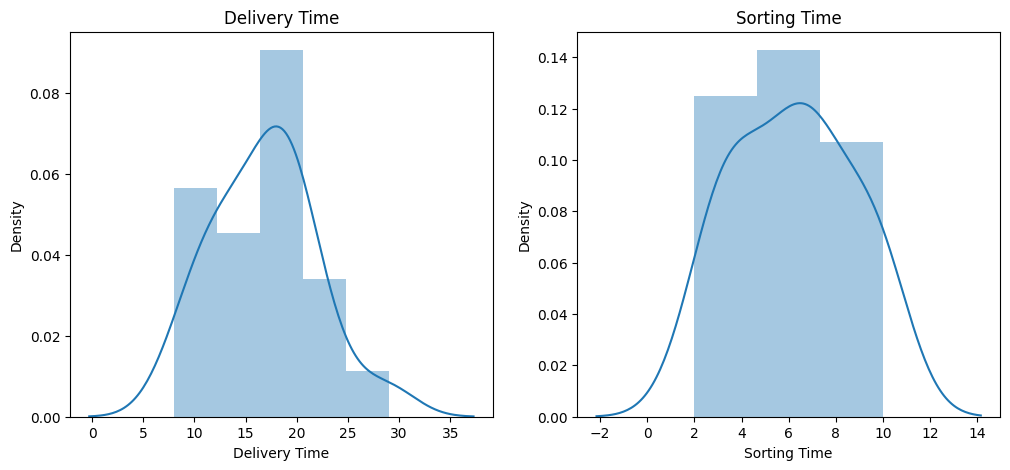

In [7]:
#Check for skewness
plt.subplots(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(dataset['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(1,2,2)
sns.distplot(dataset['Sorting Time'])
plt.title('Sorting Time')
plt.show()

**Observed skewness, hence tranformation needs to be applied**

In [ ]:
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


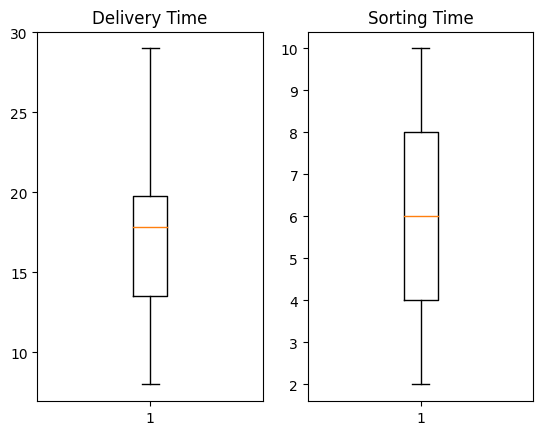

In [ ]:
#Check for outliers
plt.subplot(1,2,1)
plt.boxplot(dataset['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(1,2,2)
plt.boxplot(dataset['Sorting Time'])
plt.title('Sorting Time')
plt.show()

**No outliers found**

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

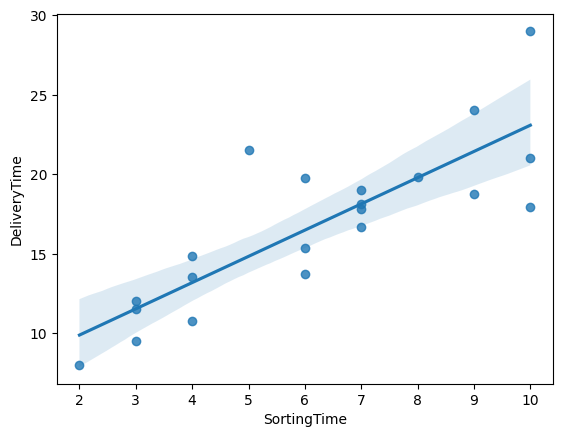

In [ ]:
dataset1=dataset.rename({'Delivery Time':'DeliveryTime', 'Sorting Time':'SortingTime'},axis=1)
sns.regplot(x=dataset1['SortingTime'],y=dataset1['DeliveryTime'])

# **Model Building**

**Model1: Model without any tranformation**

In [ ]:
model=smf.ols("DeliveryTime~SortingTime",data=dataset1).fit() 
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 20 May 2023   Prob (F-statistic):           3.98e-06
Time:                        16:46:03   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Find tvalues and pvalues
model.tvalues , model.pvalues

(Intercept      3.823349
 SortingTime    6.387447
 dtype: float64,
 Intercept      0.001147
 SortingTime    0.000004
 dtype: float64)

In [ ]:
# Find Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

**Model2: Regression model on log tranformed data**

In [ ]:
import statsmodels.formula.api as sm

log_model = sm.ols('np.log(DeliveryTime)~np.log(SortingTime)', data = dataset1).fit()

**Do prediction with both the models**

In [ ]:
predicted = pd.DataFrame()
predicted['SortingTime'] = dataset1.SortingTime
predicted['Actual_Delivery_Time'] = dataset1.DeliveryTime
predicted['Pred_Delivery_Time']=model.predict(dataset1['SortingTime'])
#Find error without any tranformation
predicted['Error']=predicted['Actual_Delivery_Time'] - predicted['Pred_Delivery_Time']
#Inverse the log tranformed values by raising the values over exp for prediction
predicted['Predicted_Delivery_Time_log'] = pd.DataFrame(np.exp(log_model.predict(predicted.SortingTime)))
#Find error with log any tranformation
predicted['Error_log']=predicted['Actual_Delivery_Time'] - predicted['Predicted_Delivery_Time_log']
predicted

,SortingTime,Actual_Delivery_Time,Pred_Delivery_Time,Error,Predicted_Delivery_Time_log,Error_log
0,10,21.00,23.072933,-2.072933,22.597360,-1.597360
1,4,13.50,13.178814,0.321186,13.070123,0.429877
2,6,19.75,16.476853,3.273147,16.653216,3.096784
3,9,24.00,21.423913,2.576087,21.218593,2.781407
4,10,29.00,23.072933,5.927067,22.597360,6.402640
5,6,15.35,16.476853,-1.126853,16.653216,-1.303216
6,7,19.00,18.125873,0.874127,18.259981,0.740019
7,3,9.50,11.529794,-2.029794,11.005911,-1.505911
8,10,17.90,23.072933,-5.172933,22.597360,-4.697360
9,9,18.75,21.423913,-2.673913,21.218593,-2.468593


**Calculate RMSE for both the models**

In [ ]:
from sklearn.metrics import mean_squared_error
log_model_pred_y =np.exp(log_model.predict(dataset1['SortingTime']))
Log__rmse =np.sqrt(mean_squared_error(predicted['Actual_Delivery_Time'], predicted['Predicted_Delivery_Time_log']))
Reg__rmse =np.sqrt(mean_squared_error(predicted['Actual_Delivery_Time'], predicted['Pred_Delivery_Time']))

print(Reg__rmse,'\n',Log__rmse)

2.7916503270617654 
 2.745828897614548


**Finally,Regression model on log transformed data is proven better**